In [1]:
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  3697k      0  0:00:02  0:00:02 --:--:-- 3696k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0  43825      0 --:--:-- --:--:-- --:--:-- 43825


In [2]:
!curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0   935k      0  0:00:01  0:00:01 --:--:--  935k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0  10612      0 --:--:-- --:--:-- --:--:-- 10612


In [3]:
!gunzip t*-ubyte.gz

gzip: t10k-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: t10k-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: train-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: train-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? y


In [0]:
import numpy as np
import time
from mlxtend.data import loadlocal_mnist
from sklearn.metrics import accuracy_score
X, y = loadlocal_mnist(
    
        images_path='/content/train-images-idx3-ubyte', 
        labels_path='/content/train-labels-idx1-ubyte',)

In [0]:
X_test, y_test = loadlocal_mnist(
        images_path='/content/t10k-images-idx3-ubyte', 
        labels_path='/content/t10k-labels-idx1-ubyte',)

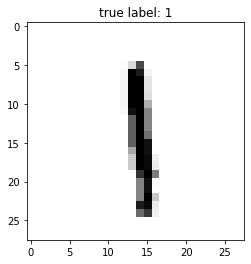

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()
plot_digit(X, y, 8) 

In [0]:
X_train = np.asarray(X).astype(np.float32)
y_train = np.asarray(y).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [0]:
X = X_train / 255.0
X_T = X_test / 255.0

In [12]:
'''
trainstd = np.std(X, 0)
teststd = np.std(X_T, 0)
trainmu = np.mean(X, 0)
testmu = np.mean(X_T, 0)

X  = (X - trainmu)/ trainstd
X[np.isnan(X)] = 0

X_T =  (X_T - testmu)/ teststd
X_T[np.isnan(X_T)] = 0
X_T[np.isinf(X_T)] = 0
X = np.hstack((X, np.ones((X.shape[0], 1), dtype=X.dtype)))
X_T = np.hstack((X_T, np.ones((X_T.shape[0], 1), dtype=X_T.dtype)))
'''


'\ntrainstd = np.std(X, 0)\nteststd = np.std(X_T, 0)\ntrainmu = np.mean(X, 0)\ntestmu = np.mean(X_T, 0)\n\nX  = (X - trainmu)/ trainstd\nX[np.isnan(X)] = 0\n\nX_T =  (X_T - testmu)/ teststd\nX_T[np.isnan(X_T)] = 0\nX_T[np.isinf(X_T)] = 0\nX = np.hstack((X, np.ones((X.shape[0], 1), dtype=X.dtype)))\nX_T = np.hstack((X_T, np.ones((X_T.shape[0], 1), dtype=X_T.dtype)))\n'

In [0]:
from scipy import stats
X = stats.zscore(X_train, axis=1)
X_T = stats.zscore(X_test, axis=1)


In [0]:
for label in range (0, len(y_train)):
  if y_train[label] <= 4:
    y_train[label] = 0
  else:
    y_train[label] = 1

In [0]:
for label in range (0, len(y_test)):
  if y_test[label] <= 4:
    y_test[label] = 0
  else:
    y_test[label] = 1

##Question1

In [0]:
def calculate_loss(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=5):
    m = len(y)
    for it in range(iterations):
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:]
            y_i = y[rand_ind]
            prediction = np.dot(X_i,theta)
            theta -= (1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
    return theta

In [0]:
eta = 0.5
ITNUM = 5

N = 60000

mu = 0
sigma = 0.01 

th = np.random.normal(mu, sigma, X.shape[1])
theta = stocashtic_gradient_descent(X, y_train, th, eta, ITNUM)
ypred = X.dot(theta)
ypred = np.where(ypred > 0.5, 1, 0)

In [42]:
# y_test_pred = convert_to_categorical(x_test.dot(theta), 10000)
y_test_pred = np.where(X_T.dot(theta) > 0.5, 1, 0)
print(accuracy_score(y_test_pred, y_test))

0.8549


In [0]:
import numpy as np
def add_bias(X):
    return np.concatenate([X,np.ones((X.shape[0],1))],1)

def relu(x):
    return np.maximum(x,0)

def predict(w,U,x):
    return w.dot(relu(U.dot(x)))

def get_grad(w,U,y,x):
    h=relu(U.dot(x))
    sigmap=U.dot(x)>0+0.
    yh=predict(w,U,x)
    r=yh-y
    grad_w=r*h
    grad_U=r*np.outer(w*sigmap,x)
    return grad_w,grad_U

def quad_loss(w,U,Y,X):
    return npl.norm(Y-predict(w,U,X))**2

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_logistic(w,U,x):
    return sigmoid(w.dot(relu(U.dot(x))))



def get_grad_logistic(w,U,y,x):
    yh = w.dot(relu(U.dot(x)))
    r=yh-y
    sigmap=U.dot(x)>0+0
    gw = -((2*y - 1) * relu(U.dot(x)) * sigmoid(yh) * (1 -sigmoid(yh)))/(1 + np.exp((2*y - 1) * yh))
    gU = -((2*y - 1)  * sigmoid(yh) * (1 -sigmoid(yh)) * np.outer(w*sigmap,x))/ (1 + np.exp((2*y - 1) * yh))
    return gw,gU



def logistic_loss(w, U, X, y):
    m = X.shape[1]
    #A = sigmoid(np.dot(w.T, X) + b)
    A = predict_logistic(w, U, X)
    #return (-1/m) * np.sum(y * np.log(A) + (1 - y) * (np.log(1-A)))
    return (y *np.log(A) + (1- y)*np.log(1 - A)).sum()/m



##Question4

In [27]:

############# Question 4 #####correct

k= 200 # Number of hidden units
d=785  # Input dimension. The third dimension is for bias
#U=np.random.randn(k,d)*0.01 # Input layer
#w=np.random.randn(k)*0.01 # Output layer
U = np.random.normal(0, 1/k, k*d).reshape(k,d)
w = np.random.normal(0, 0.01, k)
eta=0.0001  # learning rate

Xb=add_bias(X)
Xbt=add_bias(X_T)
accArr_test = []
accArr_train = []

ITNUM= 5
for it in range(ITNUM):
    grad_w=0
    grad_U=0
    indices = [i for i in range(50000)]
    np.random.shuffle(indices)

    for i in indices:
        gw,gU=get_grad_logistic(w,U,y_train[i],Xb[i])

        w-=eta*gw
        U-=eta*gU

        if i%1000 == 0:
            Yh=predict(w,U,Xbt.T)>0.5+0
            Yt=predict(w,U,Xb.T)>0.5+0
            accuracy_score(Yh, y_test )
            print("Test accuracy:", accuracy_score(Yh, y_test ))
            print("Train accuracy:", accuracy_score(Yt, y_train ))
            acc_test = accuracy_score(Yh, y_test)
            acc_train = accuracy_score(Yt, y_train)
            accArr_test.append(acc_test)
            accArr_train.append(acc_train)

Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train accuracy: 0.5099333333333333
Test accuracy: 0.5139
Train acc

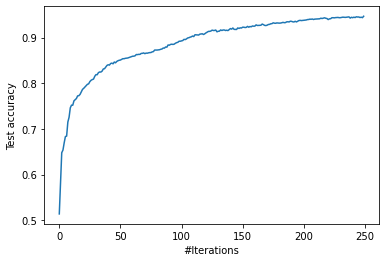

In [43]:
import matplotlib.pyplot as plt
plt.plot(accArr_test)
plt.ylabel('TestAccuracy')
plt.xlabel('Iterations')
plt.show()

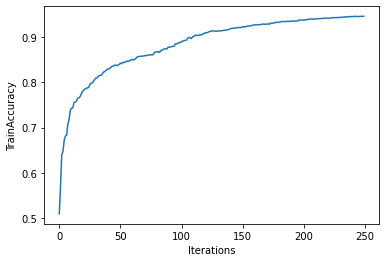

In [44]:
import matplotlib.pyplot as plt
plt.plot(accArr_train)
plt.ylabel('TrainAccuracy')
plt.xlabel('Iterations')
plt.show()

In [22]:
Yh=predict(w,U,Xbt.T)>0.5+0
accuracy_score(Yh, y_test )

0.8543

###Question 3

In [33]:
########## Question 3  #####correct


k= 40 # Number of hidden units
d= 785 # Input dimension. The third dimension is for bias

#U=np.random.randn(k,d)*0.01 # Input layer
#w=np.random.randn(k)*0.01 # Output layer
U = np.random.normal(0, 1/k, k*d).reshape(k,d)
w = np.random.normal(0, 0.01, k)

N = 50000
eta= 0.0001  


ITNUM= 5
accArr_test=[]
accArr_train=[]
for it in range(ITNUM):
    grad_w=0
    grad_U=0
    indices = [i for i in range(50000)]
    np.random.shuffle(indices)
    for i in indices:
        gw,gU=get_grad(w,U,y_train[i],Xb[i])
        w-=eta* gw
        U-=eta* gU

        if i%1000 == 0:
            Yh=predict(w,U,Xbt.T)>0.5+0
            Yt=predict(w,U,Xb.T)>0.5+0
            print("test_accuracy:", accuracy_score(Yh, y_test ))
            acc = accuracy_score(Yh, y_test )
            accArr_test.append(acc)

            print("train_accuracy:", accuracy_score(Yt, y_train ))
            acc = accuracy_score(Yt, y_train )
            accArr_train.append(acc)

test_accuracy: 0.5139
train_accuracy: 0.5099333333333333
test_accuracy: 0.5787
train_accuracy: 0.5702333333333334
test_accuracy: 0.6479
train_accuracy: 0.6400333333333333
test_accuracy: 0.6536
train_accuracy: 0.64705
test_accuracy: 0.6695
train_accuracy: 0.67155
test_accuracy: 0.6833
train_accuracy: 0.6811833333333334
test_accuracy: 0.6842
train_accuracy: 0.6832833333333334
test_accuracy: 0.715
train_accuracy: 0.70745
test_accuracy: 0.7255
train_accuracy: 0.7178166666666667
test_accuracy: 0.7461
train_accuracy: 0.73795
test_accuracy: 0.752
train_accuracy: 0.7428333333333333
test_accuracy: 0.7518
train_accuracy: 0.7428666666666667
test_accuracy: 0.7614
train_accuracy: 0.7548833333333334
test_accuracy: 0.7638
train_accuracy: 0.7565333333333333
test_accuracy: 0.7665
train_accuracy: 0.7575
test_accuracy: 0.7723
train_accuracy: 0.76475
test_accuracy: 0.7727
train_accuracy: 0.7652666666666667
test_accuracy: 0.7756
train_accuracy: 0.7678666666666667
test_accuracy: 0.7813
train_accuracy: 0.773

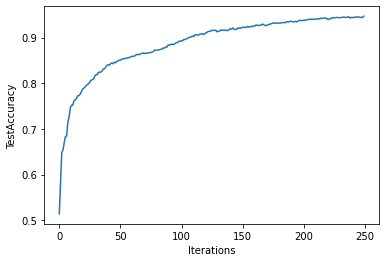

In [34]:
import matplotlib.pyplot as plt
plt.plot(accArr_test)
plt.ylabel('TestAccuracy')
plt.xlabel('Iterations')
plt.show()

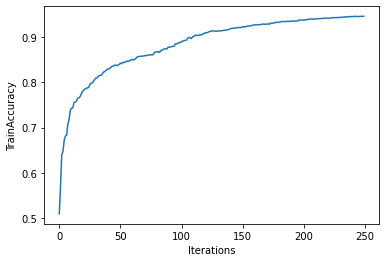

In [35]:
import matplotlib.pyplot as plt
plt.plot(accArr_train)
plt.ylabel('TrainAccuracy')
plt.xlabel('Iterations')
plt.show()

In [36]:
Yh=predict(w,U,Xbt.T)>0.5+0
accuracy_score(Yh, y_test )

0.9467